In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import shutil

In [12]:
df = pd.read_csv('data/tables/flickr_image_search_for_LANDSCAPE_100.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49998
Data columns (total 24 columns):
geo_is_public     48566 non-null float64
place_id          48561 non-null object
owner             49999 non-null object
id                49999 non-null int64
title             49892 non-null object
woeid             48561 non-null float64
views             49999 non-null int64
geo_is_friend     48566 non-null float64
geo_is_contact    48566 non-null float64
farm              49999 non-null int64
secret            49999 non-null object
ownername         49999 non-null object
latitude          49999 non-null float64
accuracy          49999 non-null int64
isfamily          49999 non-null int64
machine_tags      2110 non-null object
tags              49999 non-null object
isfriend          49999 non-null int64
geo_is_family     48566 non-null float64
license           49999 non-null int64
ispublic          49999 non-null int64
longitude         49999 non-null float64
server       

In [14]:
df = df[['id','title','owner','farm','server','secret','context','views']]

In [15]:
df.head()

,id,title,owner,farm,server,secret,context,views
0,28063510442,Twisted Sisters,79852347@N06,8,7411,cb63c00787,0,4672
1,27847929020,"sea, Vieste, sky",14279081@N08,8,7519,b5b87102dd,0,3353
2,27782494500,Sea Of Misery,135954718@N02,8,7360,554fcbb696,0,54639
3,27914750402,Marjal Reflections III. [Explored & FP 07-01-2...,112711738@N06,8,7520,c6b1314767,0,35634
4,27719697940,Just passing by...,62118446@N03,8,7617,28a96624d4,0,6161


In [37]:
url = 'https://farm{farm_id}.staticflickr.com/{server_id}/{ID}_{secret}_o.jpg'
url_list = [url.format(farm_id=df['farm'][i], server_id=df['server'][i], ID=df['id'][i], secret=df['secret'][i]) for i in range(len(df))]

In [38]:
df['url'] = url_list

In [39]:
df.head()

,id,title,owner,farm,server,secret,context,views,url
0,28063510442,Twisted Sisters,79852347@N06,8,7411,cb63c00787,0,4672,https://farm8.staticflickr.com/7411/2806351044...
1,27847929020,"sea, Vieste, sky",14279081@N08,8,7519,b5b87102dd,0,3353,https://farm8.staticflickr.com/7519/2784792902...
2,27782494500,Sea Of Misery,135954718@N02,8,7360,554fcbb696,0,54639,https://farm8.staticflickr.com/7360/2778249450...
3,27914750402,Marjal Reflections III. [Explored & FP 07-01-2...,112711738@N06,8,7520,c6b1314767,0,35634,https://farm8.staticflickr.com/7520/2791475040...
4,27719697940,Just passing by...,62118446@N03,8,7617,28a96624d4,0,6161,https://farm8.staticflickr.com/7617/2771969794...


In [40]:
def get_picture(ID, owner, search_term, url):
    file_name = 'data/images/{}/{}_{}.jpg'.format(search_term, owner, ID)
    r = requests.get(url, stream=True)
    with open(file_name, 'wb') as out_file:
        shutil.copyfileobj(r.raw, out_file)
    del r

In [41]:
for i in range(5):
    ID = df['id'][i]
    owner = df['owner'][i]
    search_term = 'LANDSCAPE'
    url = df['url'][i]
    get_picture(ID, owner, search_term, url)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x106339ed0>]], dtype=object)

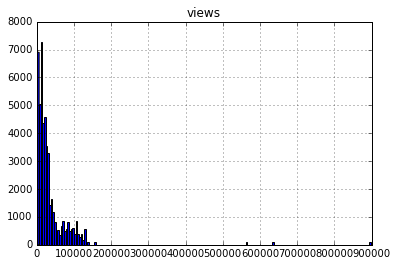

In [7]:
df.hist('views', bins=200)

In [19]:
df['views'].min()

2128